In [1]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [4]:
df

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,5032.165498,Basic,66367,Suburban,64,6,48,307.200000,Two-Door Car,37.492591
6813,YM19146,California,4100.398533,Premium,47761,Suburban,104,16,58,541.282007,Four-Door Car,48.946675
6814,LA72316,California,23405.987980,Basic,71941,Urban,73,18,89,198.234764,Four-Door Car,65.310053
6815,PK87824,California,3096.511217,Extended,21604,Suburban,79,14,28,379.200000,Four-Door Car,48.002914


In [5]:
df = df.drop(['Customer','CLV','monthly_premium','Months_Since_Policy_Inception','months_last_claim'],axis=1)

In [6]:
df.head()

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507


In [7]:
df.shape

(6817, 7)

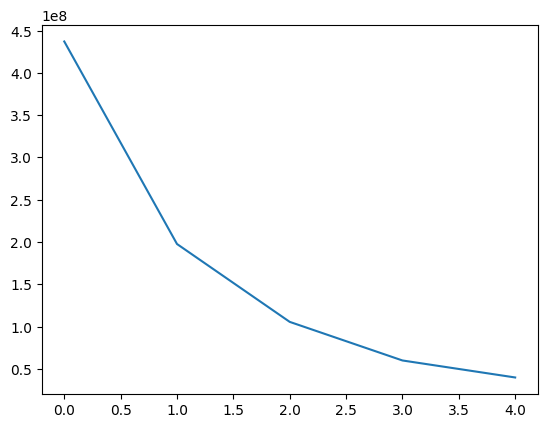

In [9]:
#Choosing optimal K
cost = []

for num_clusters in list(range(1,6)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df, categorical=[0, 1, 2, 3, 5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [10]:
kproto = KPrototypes(n_clusters=3, verbose=1,max_iter=20)
kproto.fit_predict(df, categorical=[0, 1, 2, 3, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1459, ncost: 107122718.73505186
Run: 1, iteration: 2/20, moves: 317, ncost: 105780832.99329329
Run: 1, iteration: 3/20, moves: 37, ncost: 105695631.09515734
Run: 1, iteration: 4/20, moves: 15, ncost: 105675089.61806759
Run: 1, iteration: 5/20, moves: 4, ncost: 105673094.89357433
Run: 1, iteration: 6/20, moves: 2, ncost: 105672258.20814519
Run: 1, iteration: 7/20, moves: 1, ncost: 105672244.27202898
Run: 1, iteration: 8/20, moves: 0, ncost: 105672244.27202898
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1506, ncost: 107336382.97484532
Run: 2, iteration: 2/20, moves: 305, ncost: 105855624.94573973
Run: 2, iteration: 3/20, moves: 46, ncost: 105695899.91924955
Run: 2, iteration: 4/20, moves: 16, ncost: 105675089.61806758
Run: 2, iteration:

array([0, 0, 1, ..., 1, 0, 0], dtype=uint16)

In [ ]:
# Calcular la matriz de distancias gamma
'''columnas_categoricas = df.select_dtypes(include='object')

cat_indices = [df.columns.get_loc(col) for col in columnas_categoricas]
Xnum = df.iloc[:, [i for i in range(df.shape[1]) if i not in cat_indices]].values
Xcat = df.iloc[:, cat_indices].values

gamma_matrix = np.zeros((Xnum.shape[0], Xnum.shape[0]))
for i in range(Xnum.shape[0]):
    for j in range(Xnum.shape[0]):
        num_distance = np.sum((Xnum[i, :] - Xnum[j, :])**2)
        cat_distance = np.sum(kproto._enc_map == Xcat[i, :].astype(str, copy=False).reshape(1, -1)) != np.sum(kproto._enc_map == Xcat[j, :].astype(str, copy=False).reshape(1, -1))
        gamma_matrix[i, j] = num_distance + kproto.gamma * cat_distance

# Calcular el coeficiente de silueta
silhouette = silhouette_score(gamma_matrix, kproto)
print(f'Silhouette Score: {silhouette}')
'''

In [ ]:
print(kproto.cluster_centroids_)

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
df['cluster']=cluster_dict
df['cluster'].value_counts()

In [ ]:
df.head()

## Análisis

In [ ]:
df[df['cluster']== 0].head(10)

In [ ]:
df[df['cluster']== 1].head(10)

In [ ]:
df[df['cluster']== 2].head(10)

In [ ]:
df0 = df[df['cluster']== 0]
df1 = df[df['cluster']== 1]
df2 = df[df['cluster']== 0]

In [ ]:
df0.describe()

In [ ]:
df1.describe()

In [ ]:
df2.describe()

In [ ]:
df0[['State', 'loc_type', 'Coverage', 'Vehicle_Class']].describe()

In [ ]:
df1[['State', 'loc_type', 'Coverage', 'Vehicle_Class']].describe()

In [ ]:
df2[['State', 'loc_type', 'Coverage', 'Vehicle_Class']].describe()

## Cluster 0

In [ ]:
categories = df0['Coverage'].value_counts().index
counts = df0['Coverage'].value_counts().values
plt.bar(categories, counts, width=0.5)

In [ ]:
categories = df0['loc_type'].value_counts().index
counts = df0['loc_type'].value_counts().values
plt.bar(categories, counts, width=0.5)

In [ ]:
categories = df0['Vehicle_Class'].value_counts().index
counts = df0['Vehicle_Class'].value_counts().values
plt.bar(categories, counts, width=0.5)

## Cluster 1

In [ ]:
categories = df1['Coverage'].value_counts().index
counts = df1['Coverage'].value_counts().values
plt.bar(categories, counts, width=0.5, color='orange')

In [ ]:
categories = df1['loc_type'].value_counts().index
counts = df1['loc_type'].value_counts().values
plt.bar(categories, counts, width=0.5, color='orange')

In [ ]:
categories = df1['Vehicle_Class'].value_counts().index
counts = df1['Vehicle_Class'].value_counts().values
plt.bar(categories, counts, width=0.5, color='orange')

## Cluster 2

In [ ]:
categories = df2['Coverage'].value_counts().index
counts = df2['Coverage'].value_counts().values
plt.bar(categories, counts, width=0.5, color='green')

In [ ]:
categories = df2['loc_type'].value_counts().index
counts = df2['loc_type'].value_counts().values
plt.bar(categories, counts, width=0.5, color='green')

In [ ]:
categories = df2['Vehicle_Class'].value_counts().index
counts = df2['Vehicle_Class'].value_counts().values
plt.bar(categories, counts, width=0.5, color='green')

In [ ]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df, x='Income', y='Vehicle_Class', z='Total_Claim_Amount', color='cluster',title="Car Customers")
fig.show()